In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats



In [8]:
autolib=pd.read_csv('autolib_daily_events_postal_code.csv')
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [13]:
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [9]:
autolib.shape

(16085, 13)

In [10]:
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


# Data Cleaning

In [11]:
#checking for the data types of fields in the dataset
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [139]:
#changing the data type to string 
autolib['Postal code']=autolib['Postal code'].astype(str)
autolib['dayOfWeek']=autolib['dayOfWeek'].astype(str)
autolib['n_daily_data_points']=autolib['n_daily_data_points'].astype(str)
autolib.dtypes

Postal code               object
n_daily_data_points       object
dayOfWeek                 object
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [14]:
#changing the data type to date
autolib['date']=pd.to_datetime(autolib['date'])
autolib['date'].dtype

dtype('<M8[ns]')

In [140]:
#checking for duplicates

duplicated=autolib.drop_duplicates
duplicated

<bound method DataFrame.drop_duplicates of            Postal code n_daily_data_points dayOfWeek day_type  \
date                                                            
2018-01-01       75001                1440         0  weekday   
2018-01-02       75001                1438         1  weekday   
2018-01-03       75001                1439         2  weekday   
2018-01-04       75001                1320         3  weekday   
2018-01-05       75001                1440         4  weekday   
...                ...                 ...       ...      ...   
2018-06-15       95880                1440         4  weekday   
2018-06-16       95880                1440         5  weekend   
2018-06-17       95880                1440         6  weekend   
2018-06-18       95880                1440         0  weekday   
2018-06-19       95880                1370         1  weekday   

            BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
date                                

In [16]:
#stripping all the spaces in our column names
autolib.columns.str.strip()

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [17]:
#setting the date to be the index
autolib=autolib.set_index('date')
autolib.head()

,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
date,,,,,,,,,,,,
2018-01-01,75001,1440,0,weekday,110,103,3,2,10,9,22,20
2018-01-02,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2018-01-03,75001,1439,2,weekday,138,139,0,0,2,2,27,27
2018-01-04,75001,1320,3,weekday,104,104,2,2,9,8,25,21
2018-01-05,75001,1440,4,weekday,114,117,3,3,6,6,18,20


In [18]:
#checking for null values
autolib.isnull().any()

Postal code               False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [ ]:
The dataset has no null values

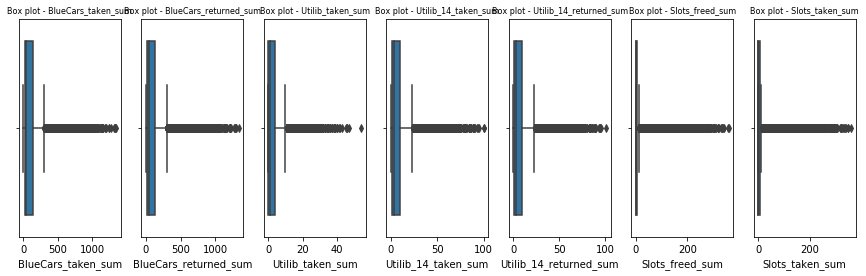

In [19]:
#checking for outliers
col_names = ['BlueCars_taken_sum','BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(ncols=len(col_names), figsize=(15,4))

for i, col_val in enumerate(col_names):

    sns.boxplot(autolib[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=8)
   



plt.show()

# Univariate Analysis

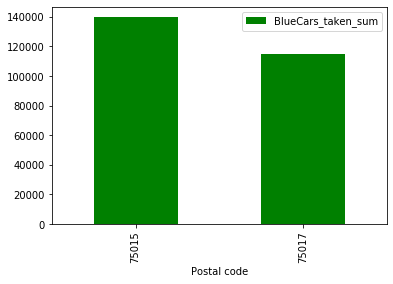

In [109]:
#bar plot showing the number of blue cars taken in areas with postal code 75015 and 75017 respectively
filtered=autolib[(autolib['Postal code']=='75015') |  (autolib['Postal code']== '75017')]
filtered[['BlueCars_taken_sum', 'Postal code']].groupby(filtered['Postal code']).sum().plot.bar(color='green')


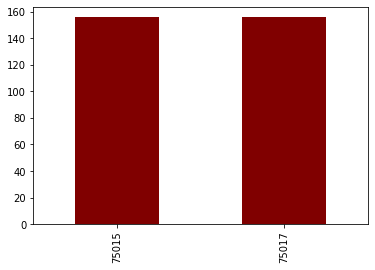

In [115]:
#value count for postal code 75015 and 75017
filtered['Postal code'].value_counts().plot.bar(color='maroon')

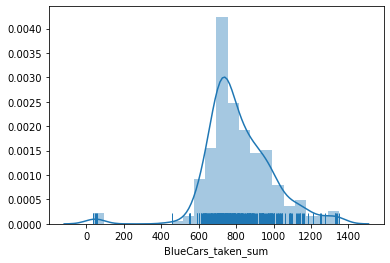

In [135]:
#Bluecars take sum distribution
ax=sns.distplot(filtered['BlueCars_taken_sum'], rug=True, hist=True)

In [ ]:
The distribution is close to a normal distribution but seem abit skewed to the right

# Bivariate Analysis

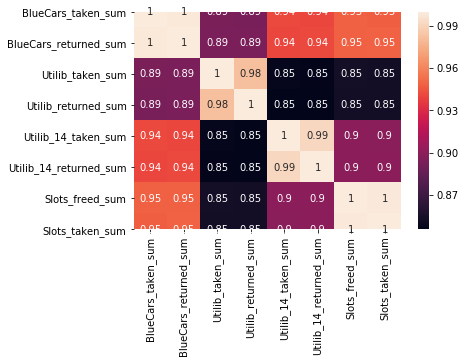

In [24]:
#how the numerical variables in the data is correlating
sns.heatmap(autolib.corr(),annot=True)
plt.show()

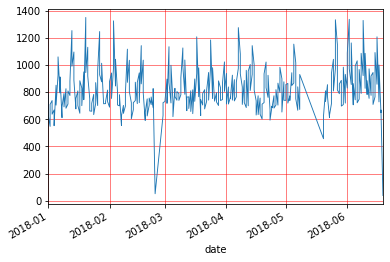

In [37]:
#Time series visualization for Bluecars sum taken
fig, ax=plt.subplots()
filtered['BlueCars_taken_sum'].plot.line(linewidth=0.9)
ax.grid(linestyle='-', linewidth='0.5', color='red')

In [26]:
#filter our dataframe to take only postal codes 75015 and 75017
filtered['WeekdayName']= filtered.index.day_name()
df0=filtered[['BlueCars_taken_sum', 'WeekdayName', 'Postal code', 'day_type']]
df1=df0[df0['Postal code']=='75015']
df2=df0[df0['Postal code']=='75017']
print(df1)
print(df2)


            BlueCars_taken_sum WeekdayName Postal code day_type
date                                                           
2018-01-01                 781      Monday       75015  weekday
2018-01-02                 710     Tuesday       75015  weekday
2018-01-03                 739   Wednesday       75015  weekday
2018-01-04                 669    Thursday       75015  weekday
2018-01-05                 852      Friday       75015  weekday
...                        ...         ...         ...      ...
2018-06-15                1093      Friday       75015  weekday
2018-06-16                1209    Saturday       75015  weekend
2018-06-17                1001      Sunday       75015  weekend
2018-06-18                 669      Monday       75015  weekday
2018-06-19                  49     Tuesday       75015  weekday

[156 rows x 4 columns]
            BlueCars_taken_sum WeekdayName Postal code day_type
date                                                           
2018-01-01      

C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


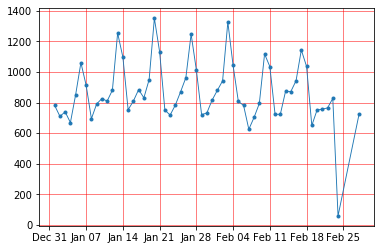

In [34]:
#customizing the time seris plot so that the begining og the x-ticks on the grid will start on Monday
#and end on sunday for better visualization of the trend
import matplotlib.dates as mdates
fig, ax=plt.subplots()
ax.plot(df1.loc['2018-1' : '2018-02', 'BlueCars_taken_sum'], marker='.', linewidth=0.9)
ax.grid(linestyle='-', linewidth='0.5', color='red')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

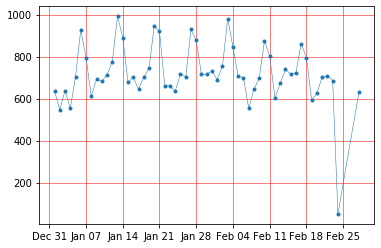

In [33]:
fig, ax=plt.subplots()
ax.plot(df2.loc['2018-1' : '2018-02', 'BlueCars_taken_sum'], marker='.')
ax.grid(linestyle='-', linewidth='0.5', color='red')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [58]:
#checking the proportion of postal code 75015 and 75017 in the data set
filtered['Postal code'].value_counts()

75015    156
75017    156
Name: Postal code, dtype: int64

In [70]:
#selecting a sample of postal code 75015
np.random.seed(5)
sample_1=df1.sample(n=16)
sample_1

,BlueCars_taken_sum,WeekdayName,Postal code,day_type
date,,,,
2018-05-03,773,Thursday,75015,weekday
2018-01-22,751,Monday,75015,weekday
2018-02-20,751,Tuesday,75015,weekday
2018-02-09,794,Friday,75015,weekday
2018-04-01,939,Sunday,75015,weekend
2018-03-14,811,Wednesday,75015,weekday
2018-01-02,710,Tuesday,75015,weekday
2018-02-16,943,Friday,75015,weekday
2018-02-12,723,Monday,75015,weekday


In [69]:
#selecting a sample of postal code 75017
np.random.seed(4)
sample_2=df2.sample(n=16)
sample_2

,BlueCars_taken_sum,WeekdayName,Postal code,day_type
date,,,,
2018-05-23,629,Wednesday,75017,weekday
2018-05-05,868,Saturday,75017,weekend
2018-02-04,846,Sunday,75017,weekend
2018-01-26,702,Friday,75017,weekday
2018-01-20,945,Saturday,75017,weekend
2018-03-14,658,Wednesday,75017,weekday
2018-04-20,724,Friday,75017,weekday
2018-01-13,992,Saturday,75017,weekend
2018-02-15,716,Thursday,75017,weekday


In [137]:
#descriptive statistics of the samples
print(sample_1['BlueCars_taken_sum'].mean())
print(sample_2['BlueCars_taken_sum'].mean())

908.5
775.5


In [138]:
#checking for normality of the BlueCars_taken_sum
from scipy.stats import shapiro 

# generating univariate observations
data = filtered['BlueCars_taken_sum']

# testing for normality
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.913, p=0.000
Sample does not look Gaussian


 # Hypothesis Testing 1

In [77]:
#two sample independet test for postal code 75017 and 75015
stats.ttest_ind(sample_1['BlueCars_taken_sum'], sample_2['BlueCars_taken_sum'])

Ttest_indResult(statistic=2.2741134877028197, pvalue=0.030277872726882087)

# Hypothesis 2
(Bonus)

In [78]:
autolib['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [84]:
np.random.seed(34)
strat_output = autolib.groupby('day_type', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_output['day_type'].value_counts())

# Check the stratified output
print(strat_output)


weekday    1154
weekend     454
Name: day_type, dtype: int64
           Postal code n_daily_data_points dayOfWeek day_type  \
date                                                            
2018-02-19       94120                1420         0  weekday   
2018-03-27       93700                1440         1  weekday   
2018-02-12       93500                1440         0  weekday   
2018-02-12       75009                1440         0  weekday   
2018-03-20       75010                1440         1  weekday   
...                ...                 ...       ...      ...   
2018-01-21       94300                1440         6  weekend   
2018-01-28       95100                1440         6  weekend   
2018-01-14       78000                1440         6  weekend   
2018-01-13       94140                1440         5  weekend   
2018-02-18       93500                1438         6  weekend   

            BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
date              

In [90]:
strat_output['BlueCars_taken_sum'].groupby(strat_output['day_type']).mean()

day_type
weekday    121.529463
weekend    151.207048
Name: BlueCars_taken_sum, dtype: float64

In [102]:
filtered_2= autolib[['BlueCars_taken_sum', 'day_type' ]]
filtered_2= filtered_2[filtered_2['day_type']=='weekend']
filtered_2['BlueCars_taken_sum'].mean()

151.09006826690157

In [103]:
filtered_2['BlueCars_taken_sum'].std()

218.5656415891513

In [104]:
import math


sample_size =454
pop_mean = 151.09006826690157
sample_mean = 151.207048
pop_std=218.5656415891513
# zscore = (sample_mean - pop_mean) / pop_std/sqrt(sample_size)
z_score = (151.207048 - 151.09006826690157) / (218.5656415891513/ (math.sqrt(454)))
z_score

0.011403985605780483